# Agrupamento de dados

### k-means:

O algoritmo k-means é um método de agrupamento amplamente utilizado que divide um conjunto de dados em k grupos, onde "k" é um número predefinido. Ele funciona iterativamente atribuindo pontos de dados a grupos com base na distância entre eles. O objetivo é minimizar a variação intra-grupo, ou seja, tornar os pontos dentro de cada grupo o mais semelhantes possível. O k-means é eficaz quando o número de clusters desejados é conhecido a priori.

### Fuzzy c-means:

O método Fuzzy c-means é uma extensão do k-means que permite que os pontos de dados pertençam a múltiplos clusters com graus variáveis de pertinência. Em vez de atribuir rigidamente um ponto a um único cluster, o fuzzy c-means associa probabilidades de pertinência a cada ponto para cada cluster. Isso torna o fuzzy c-means mais adequado quando os pontos de dados podem ter associações difusas com múltiplos clusters. 

### Processo de Aplicação:

Pré-processamento de Dados:

Antes de aplicar qualquer método de agrupamento, é essencial preparar os dados, incluindo tratamento de valores ausentes, normalização e seleção de recursos relevantes.
Escolha do Método de Agrupamento:

Com base na natureza dos dados e nos objetivos da análise, escolha o método de agrupamento adequado. O k-means é uma escolha sólida quando se deseja agrupar em clusters rígidos, enquanto o fuzzy c-means é preferível quando a associação a múltiplos clusters é plausível.
Definindo o Número de Clusters (k):

Para métodos como k-means, você deve determinar o número ideal de clusters (k) com base em critérios como o método do cotovelo ou validação externa.
Aplicação do Método:

Aplique o método de agrupamento escolhido aos seus dados, atribuindo os pontos de dados aos clusters correspondentes.
Avaliação dos Resultados:

Avalie a qualidade dos clusters formados usando métricas como a inércia, a silhueta ou a validação externa, dependendo do método.
Interpretação dos Resultados:

Analise os clusters obtidos para extrair insights significativos ou tomar decisões relevantes, dependendo do domínio de aplicação.

In [ ]:
pip install -U scikit-fuzzy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import skfuzzy as fuzz

In [ ]:

# Crie dados de exemplo
n_samples = 300
n_features = 2
n_clusters = 3

# Gere dados sintéticos usando make_blobs
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# Visualize os dados de exemplo
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=30)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dados de Exemplo')
plt.show()

# Aplique o algoritmo K-Means para agrupar os dados em clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # Definindo n_init explicitamente
kmeans.fit(X)

# Obtenha os centróides e rótulos dos clusters
centroids_kmeans = kmeans.cluster_centers_
labels_kmeans = kmeans.labels_

# Visualize os resultados do K-Means
colors = ['r', 'g', 'b']

for i in range(n_clusters):
    plt.scatter(X[labels_kmeans == i, 0], X[labels_kmeans == i, 1], c=colors[i], marker='o', s=30, label=f'Cluster {i + 1}')

plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='black', marker='x', s=100, label='Centróides (K-Means)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Resultados do Agrupamento (K-Means)')
plt.legend()
plt.show()

# Aplique o algoritmo Fuzzy C-Means para agrupar os dados
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

# Obtenha os rótulos dos clusters a partir dos graus de pertinência
labels_fuzzy = np.argmax(u, axis=0)

# Visualize os resultados do Fuzzy C-Means
for i in range(n_clusters):
    plt.scatter(X[labels_fuzzy == i, 0], X[labels_fuzzy == i, 1], c=colors[i], marker='o', s=30, label=f'Cluster {i + 1}')

plt.scatter(cntr[:, 0], cntr[:, 1], c='black', marker='x', s=100, label='Centróides (FCM)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Resultados do Agrupamento (Fuzzy C-Means)')
plt.legend()
plt.show()


# Redução de dimensionalidade

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Redução de dimensionalidade usando PCA (2 componentes principais)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Redução de dimensionalidade usando t-SNE (2 dimensões)
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X)

# Plot dos resultados do PCA
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Plot dos resultados do t-SNE
plt.subplot(122)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('t-SNE')
plt.xlabel('Dimensão 1 (t-SNE)')
plt.ylabel('Dimensão 2 (t-SNE)')

plt.tight_layout()
plt.show()


# Detecção de Anomalias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import GaussianMixture

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data

# Reduzir a dimensionalidade para fins de visualização
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Criar um subplot com duas colunas para LOF e GMM
plt.figure(figsize=(12, 6))

# LOF
plt.subplot(1, 2, 1)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof.fit(X)
outliers_lof = lof.negative_outlier_factor_

# Plotar os pontos e destacar os outliers detectados pelo LOF
plt.scatter(X_r[:, 0], X_r[:, 1], color='k', s=3, label='Dados')
plt.scatter(X_r[outliers_lof < -1.5, 0], X_r[outliers_lof < -1.5, 1], color='r', s=20, edgecolor='k', label='Outliers LOF')
plt.title('Local Outlier Factor (LOF)')

# GMM
plt.subplot(1, 2, 2)
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
probs = gmm.score_samples(X)

# Definir um limiar para identificar outliers pelo GMM
threshold = np.percentile(probs, 1)
outliers_gmm = (probs < threshold)

# Plotar os pontos e destacar os outliers detectados pelo GMM
plt.scatter(X_r[:, 0], X_r[:, 1], color='k', s=3, label='Dados')
plt.scatter(X_r[outliers_gmm, 0], X_r[outliers_gmm, 1], color='b', s=20, edgecolor='k', label='Outliers GMM')
plt.title('Gaussian Mixture Models (GMM)')

plt.legend()
plt.show()


# Regressão

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Gerar dados sintéticos
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Linear
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
linear_r2 = r2_score(y_test, linear_pred)

# K-Nearest Neighbors (KNN)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
knn_pred = knn_reg.predict(X_test)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
knn_r2 = r2_score(y_test, knn_pred)

# Redes Neurais Artificiais (RNA)
mlp_reg = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)
mlp_reg.fit(X_train, y_train.ravel())  # MLPRegressor espera um vetor 1D para o y
mlp_pred = mlp_reg.predict(X_test)
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_pred))
mlp_r2 = r2_score(y_test, mlp_pred)

# Máquinas de Vetores de Suporte (SVM)
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train.ravel())
svm_pred = svm_reg.predict(X_test)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
svm_r2 = r2_score(y_test, svm_pred)

# Imprimir resultados
print("Regressão Linear - RMSE: {:.3f}, R^2: {:.3f}".format(linear_rmse, linear_r2))
print("K-Nearest Neighbors - RMSE: {:.3f}, R^2: {:.3f}".format(knn_rmse, knn_r2))
print("Redes Neurais Artificiais - RMSE: {:.3f}, R^2: {:.3f}".format(mlp_rmse, mlp_r2))
print("Máquinas de Vetores de Suporte - RMSE: {:.3f}, R^2: {:.3f}".format(svm_rmse, svm_r2))

# Plotagem dos resultados
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='black', label='Dados reais')
plt.plot(X_test, linear_pred, color='blue', linewidth=2, label='Regressão Linear')
plt.plot(X_test, knn_pred, color='green', linewidth=2, label='KNN')
plt.plot(X_test, mlp_pred, color='red', linewidth=2, label='RNA')
plt.plot(X_test, svm_pred, color='purple', linewidth=2, label='SVM')
plt.legend()
plt.title('Comparação dos Modelos de Regressão')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


# Classificação

In [3]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.6/524.1 MB 1.2 MB/s eta 0:05:14
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/usr/lib/python3/dist-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/usr/lib/python3/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.10/http/client.py", line 466, in read
    s = self.fp.read(amt)
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.10/ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.10/ssl.py", line 1130, in read
    return self._sslobj.read(len, buffer)
TimeoutError: The r

2023-09-19 08:49:08.645013: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-19 08:49:13.383888: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-19 08:49:13.425575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 08:49:25.332179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


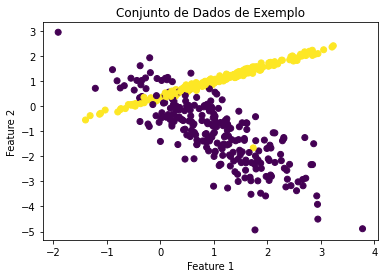

/home/adrianomedeiros/.cache/pypoetry/virtualenvs/src-SSNc2902-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


4/4 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9200
Regressão Logística - Acurácia: 0.88
k-Vizinhos Mais Próximos - Acurácia: 0.97
Máquinas de Vetores de Suporte (SVM) - Acurácia: 0.91
Árvores de Decisão - Acurácia: 0.95
Redes Neurais Artificiais - Acurácia: 0.9200000166893005


In [1]:
# Importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

# Gerar um conjunto de dados fictício
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualização dos dados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Conjunto de Dados de Exemplo')
plt.show()

# Implementação dos métodos

# Regressão Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

# k-Vizinhos Mais Próximos
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Máquinas de Vetores de Suporte (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Árvores de Decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)

# Redes Neurais Artificiais
nn_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    keras.layers.Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, verbose=0)
nn_accuracy = nn_model.evaluate(X_test, y_test)[1]

# Resultados
print(f"Regressão Logística - Acurácia: {logistic_accuracy}")
print(f"k-Vizinhos Mais Próximos - Acurácia: {knn_accuracy}")
print(f"Máquinas de Vetores de Suporte (SVM) - Acurácia: {svm_accuracy}")
print(f"Árvores de Decisão - Acurácia: {tree_accuracy}")
print(f"Redes Neurais Artificiais - Acurácia: {nn_accuracy}")
